### Import Libraries

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### Load Data

In [2]:
superheroes = pd.read_csv("superheroes.csv")
connections = pd.read_csv("links.csv")

### Create Directed Graph

In [3]:
# G = nx.DiGraph()
G = nx.Graph()

### Add Nodes with Attributes

In [4]:
for _, row in superheroes.iterrows():
    G.add_node(row['id'], name=row['name'], created_at=row['created_at'])

### Add Edges (Connections)

In [5]:
for _, row in connections.iterrows():
    G.add_edge(row['source'], row['target'])

### Show total number of superheroes and connections

In [6]:
print(f"Total superheroes: {G.number_of_nodes()}")
print(f"Total connections: {G.number_of_edges()}")

Total superheroes: 11
Total connections: 42


### Superheroes added in the last 3 days

In [7]:
today = datetime.today().date()
recent = []

for _, row in superheroes.iterrows():
    added_date = datetime.strptime(row['created_at'], "%Y-%m-%d").date()
    if (today - added_date).days <= 3:
        recent.append(row['name'])

print("\nSuperheroes added in the last 3 days:")
for hero in recent:
    print(f"- {hero}")


Superheroes added in the last 3 days:
- dataiskole


### Top 3 most connected superheroes

In [8]:
degree_list = [(node, G.degree(node)) for node in G.nodes()]
degree_list.sort(key=lambda x: x[1], reverse=True)
top_3 = degree_list[:3]

print("\nTop 3 most connected superheroes:")
for node_id, degree in top_3:
    print(f"- {G.nodes[node_id]['name']} with {degree} connections")


Top 3 most connected superheroes:
- Spider-Man with 10 connections
- Captain America with 10 connections
- Iron Man with 9 connections


### Info about `dataiskole`

In [9]:
dataiskole_id = superheroes[superheroes['name'] == 'dataiskole']['id'].values[0]
dataiskole_date = G.nodes[dataiskole_id]['created_at']
dataiskole_friends = [G.nodes[friend]['name'] for friend in G.neighbors(dataiskole_id)]

print("\nInfo about 'dataiskole':")
print(f"- Added on: {dataiskole_date}")
print("- Friends:")
for friend in dataiskole_friends:
    print(f"  • {friend}")


Info about 'dataiskole':
- Added on: 2025-05-26
- Friends:
  • Spider-Man
  • Captain America
  • Scarlet Witch


### BONUS: Draw the graph

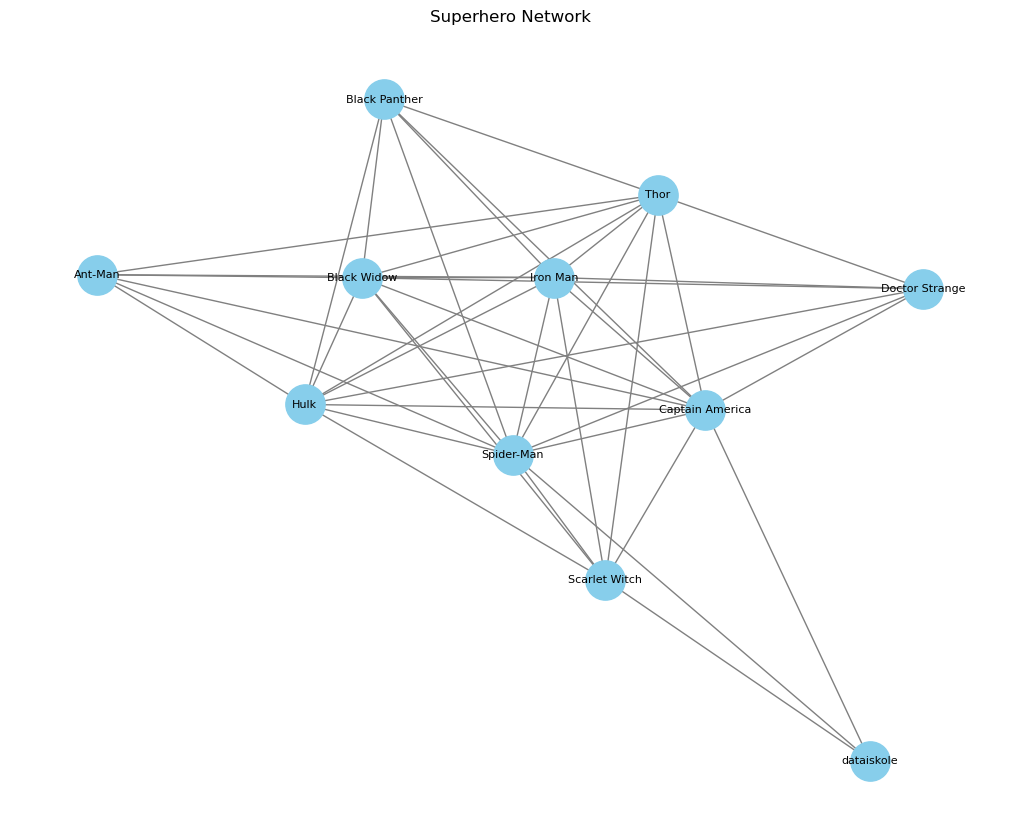

In [10]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=800, node_color="skyblue", edge_color="gray")
nx.draw_networkx_labels(G, pos, {node: G.nodes[node]['name'] for node in G.nodes()}, font_size=8)
plt.title("Superhero Network")
plt.show()